# EDSR
- 따로 학습 안하고 하고 싶을 땐 여기꺼 모듈 임포트 하고 Demo 파트 가서 진행하면 됨 

In [ ]:
#깃허브 레포지터리에 있는 파일들을 가져 옴 
! git clone https://github.com/krasserm/super-resolution

In [2]:
#super-resolution을 가져 옴 
%cd super-resolution

/content/super-resolution


In [3]:
import os
import matplotlib.pyplot as plt

from data import DIV2K
from model.edsr import edsr
from train import EdsrTrainer

%matplotlib inline

In [4]:
# Number of residual blocks
depth = 16

# Super-resolution factor
scale = 4

# Downgrade operator
downgrade = 'bicubic'

In [5]:
# Location of model weights (needed for demo)
weights_dir = f'weights/edsr-{depth}-x{scale}'
weights_file = os.path.join(weights_dir, 'weights.h5')

os.makedirs(weights_dir, exist_ok=True)

## Datasets

You don't need to download the DIV2K dataset as the required parts are automatically downloaded by the `DIV2K` class. By default, DIV2K images are stored in folder `.div2k` in the project's root directory.

In [6]:
div2k_train = DIV2K(scale=scale, subset='train', downgrade=downgrade)
div2k_valid = DIV2K(scale=scale, subset='valid', downgrade=downgrade)

In [7]:
train_ds = div2k_train.dataset(batch_size=16, random_transform=True)
valid_ds = div2k_valid.dataset(batch_size=1, random_transform=False, repeat_count=1)

246923264/246914039 [==============================] - 1s 0us/step
Caching decoded images in .div2k/caches/DIV2K_train_LR_bicubic_X4.cache ...
Cached decoded images in .div2k/caches/DIV2K_train_LR_bicubic_X4.cache.
3530612736/3530603713 [==============================] - 32s 0us/step
Caching decoded images in .div2k/caches/DIV2K_train_HR.cache ...
Cached decoded images in .div2k/caches/DIV2K_train_HR.cache.
31514624/31505881 [==============================] - 0s 0us/step
Caching decoded images in .div2k/caches/DIV2K_valid_LR_bicubic_X4.cache ...
Cached decoded images in .div2k/caches/DIV2K_valid_LR_bicubic_X4.cache.
449003520/448993893 [==============================] - 3s 0us/step
Caching decoded images in .div2k/caches/DIV2K_valid_HR.cache ...
Cached decoded images in .div2k/caches/DIV2K_valid_HR.cache.


## Training

### Pre-trained models

If you want to skip training and directly run the demo below, download [weights-edsr-16-x4.tar.gz](https://martin-krasser.de/sisr/weights-edsr-16-x4.tar.gz) and extract the archive in the project's root directory. This will create a `weights/edsr-16-x4` directory containing the weights of the pre-trained model.

In [8]:
trainer = EdsrTrainer(model=edsr(scale=scale, num_res_blocks=depth), 
                      checkpoint_dir=f'.ckpt/edsr-{depth}-x{scale}')

In [9]:
# Train EDSR model for 300,000 steps and evaluate model
# every 1000 steps on the first 10 images of the DIV2K
# validation set. Save a checkpoint only if evaluation
# PSNR has improved.
trainer.train(train_ds,
              valid_ds.take(10),
              steps=300000, 
              evaluate_every=1000, 
              save_best_only=True)

KeyboardInterrupt: ignored

In [ ]:
# Restore from checkpoint with highest PSNR
trainer.restore()

In [ ]:
# Evaluate model on full validation set
psnrv = trainer.evaluate(valid_ds)
print(f'PSNR = {psnrv.numpy():3f}')

In [ ]:
# Save weights to separate location (needed for demo)
trainer.model.save_weights(weights_file)

## Demo

### Training

### Pre-trained models

If you want to skip training and directly run the demo below, download [weights-edsr-16-x4.tar.gz](https://martin-krasser.de/sisr/weights-edsr-16-x4.tar.gz) and extract the archive in the project's root directory. This will create a `weights/edsr-16-x4` directory containing the weights of the pre-trained model.

In [10]:
!!wget https://martin-krasser.de/sisr/weights-edsr-16-x4.tar.gz

['--2022-01-10 08:46:44--  https://martin-krasser.de/sisr/weights-edsr-16-x4.tar.gz',
 'Resolving martin-krasser.de (martin-krasser.de)... 217.160.0.142, 2001:8d8:100f:f000::209',
 'Connecting to martin-krasser.de (martin-krasser.de)|217.160.0.142|:443... connected.',
 'HTTP request sent, awaiting response... 200 OK',
 'Length: 5653330 (5.4M) [application/gzip]',
 'Saving to: ‘weights-edsr-16-x4.tar.gz’',
 '',
 '',
 '          weights-e   0%[                    ]       0  --.-KB/s               ',
 'weights-edsr-16-x4. 100%[===================>]   5.39M  --.-KB/s    in 0.1s    ',
 '',
 '2022-01-10 08:46:45 (36.0 MB/s) - ‘weights-edsr-16-x4.tar.gz’ saved [5653330/5653330]',
 '']

In [12]:
!tar xvfz weights-edsr-16-x4.tar.gz

weights/
weights/edsr-16-x4/
weights/edsr-16-x4/weights.h5


In [13]:
model = edsr(scale=scale, num_res_blocks=depth)

In [16]:
model.load_weights('/content/super-resolution/weights/edsr-16-x4/weights.h5')

In [17]:
from model import resolve_single
from utils import load_image, plot_sample

def resolve_and_plot(lr_image_path):
    lr = load_image(lr_image_path)
    sr = resolve_single(model, lr)
    plot_sample(lr, sr)

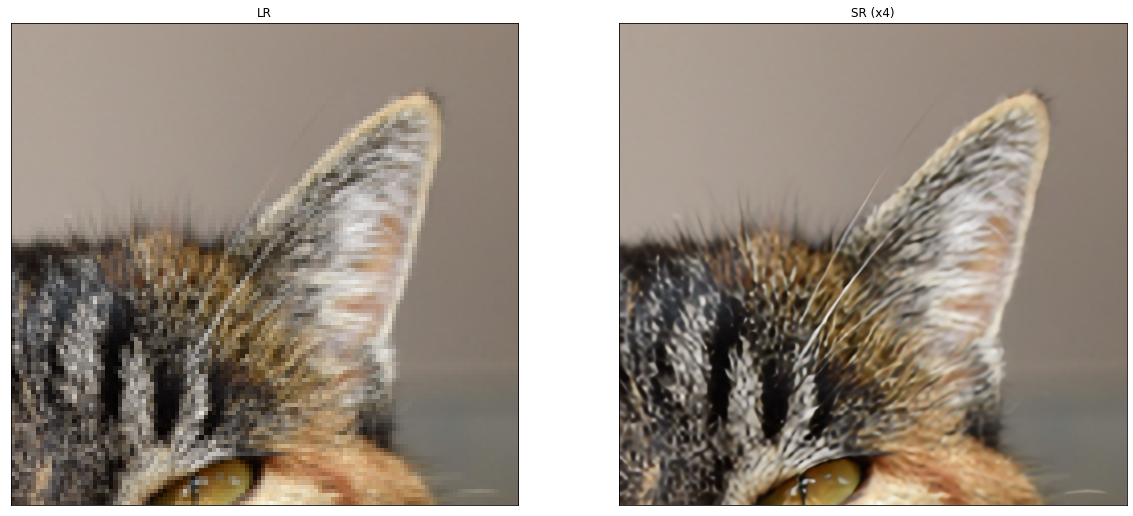

In [18]:
resolve_and_plot('demo/0869x4-crop.png')

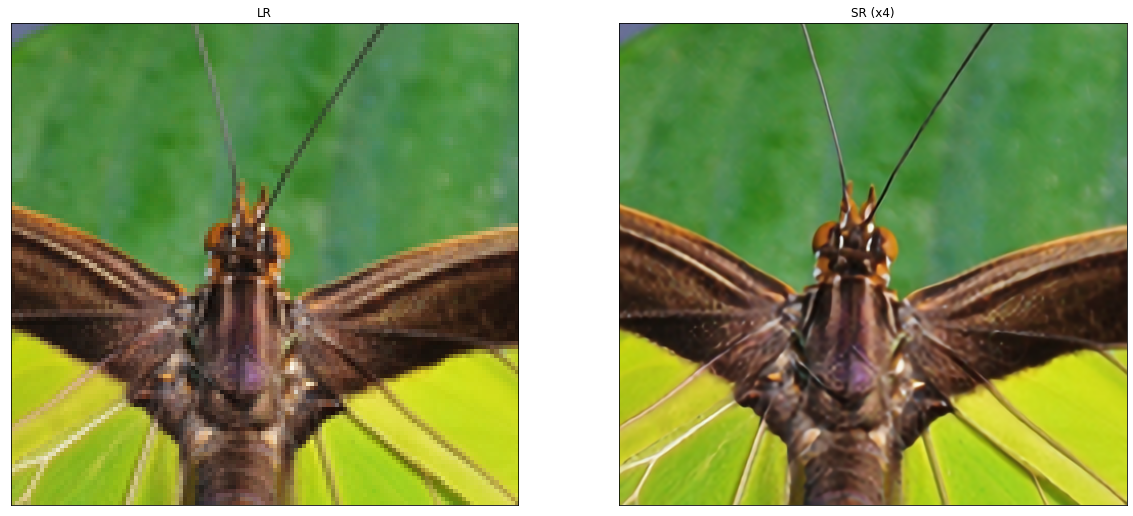

In [ ]:
resolve_and_plot('demo/0829x4-crop.png')

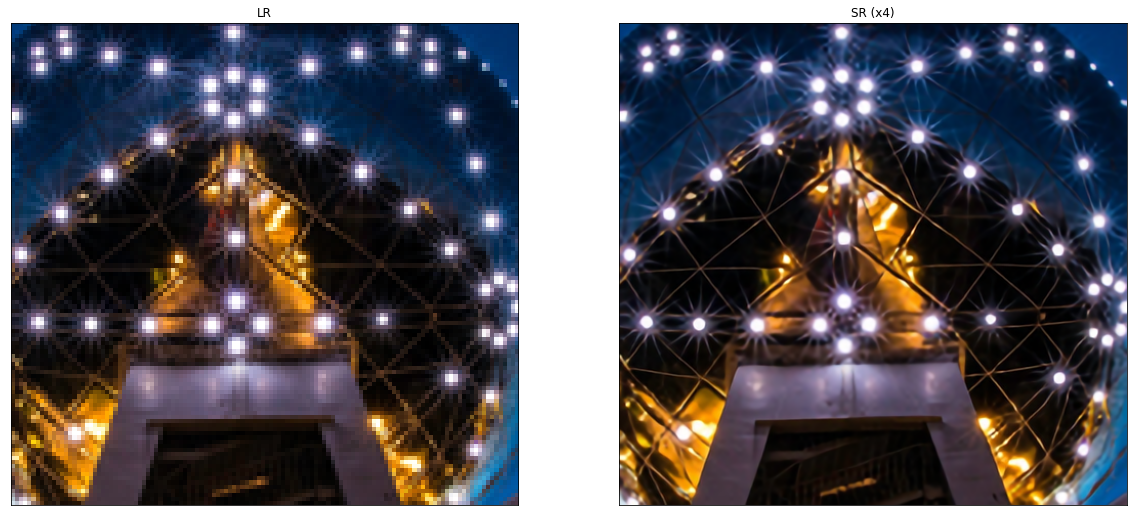

In [ ]:
resolve_and_plot('demo/0851x4-crop.png')

In [ ]:
import cv2
temp = cv2.imread('demo/0851x4-crop.png')
temp1 = cv2.imread('demo/0829x4-crop.png')

In [ ]:
temp1.shape

(118, 124, 3)

In [ ]:
temp3 = cv2.imread('/content/KakaoTalk_20220104_154740924.jpg')

In [ ]:
temp3.shape

(1001, 1022, 3)

In [ ]:
mp3 = cv2.resize(temp3,dsize = ((124,118)))